# HR Analytics Case Study - Exploratory Data Analysis and Data Cleansing

### Table of Contents

- 1.0 - Problem Statement
- 1.1 - Data Overview
- 2.0 - Importing the Data
    - 2.1 - Employee Survey Data 
    - 2.2 - General Data 
    - 2.3 - Manager Survey Data 
- 3.0 - Exploratory Data Analysis (EDA)
    - 3.1 - Employee Survey Data 
    - 3.2 - General Data
        - 3.2.1 - Employee Demographics
        - 3.2.2 - Departments
        - 3.2.3 - Education 
        - 3.2.4 - Job Level and Salary
        - 3.2.5 - Travel 
        - 3.2.6 - Work History 
    - 3.3 - Manager Survey Data
- 4.0 - Exploratory Data Analysis (EDA) when Attrition is Positive 
    - 4.1 - Merging Datasets so we can analyze employee attrition with all variables
    - 4.2 - Employee Survey Data 
    - 4.3 General Data 
        - 4.3.1 - Employee Demographics
        - 4.3.2 - Education Level
        - 4.3.3 - Salary and Income Data 
        - 4.3.4 - Work History
        - 4.3.5 - Travel
    - 4.4 - Manager Survey Data
    - 4.5 - Example of a typical employee that has positive attrition
- 5.0 - Data Cleaning
    - 5.1 - Checking for Missing Values
    - 5.2 - Insignificant Rows
    - 5.3 - Outliers
    - 5.4 - Labeling Variables
    - 5.5 - Encoding Categorical Variables
- 6.0 - Converting Cleaned Dataset to CSV for next notebook



## 1.0 - Problem Statement

XYZ, a large company with a workforce of approximately 4,000 employees, faces an annual attrition rate of 15%. This consistent loss of employees, whether due to resignations or terminations, is a concern for the management, as it negatively impacts the organization and necessitates frequent replacements from the job market.

To address this issue, our approach in this notebook will involve:

1. Cleaning the Data: Ensuring data quality by handling missing values, duplicates, and inconsistencies.
2. Feature Engineering: Creating and refining features to better capture the factors influencing attrition.
3. Exploratory Data Analysis (EDA): Understanding trends, patterns, and relationships in the data.

In the next notebook, we will focus on building and evaluating machine learning models to predict employee attrition.

## 1.1 - Data Overview

The data we will be working with is from Kaggle.com and contains 6 different excel files for approximately 4,000 employees. Each of these is listed out below. 

- **Data Dictionary:** Separate file used to describe the variables for each of the other files
- **Employee Survey Data:** Survey data from the employees of XYZ company, rating their environment satisfaction, job satisfaction, and work life balance with values between 1 (Low) to 4 (Very High or Outstanding depending on the variable)
- **General Data:** Contains general information for employees such as income, department, education, distance from home, job level, and others
- **Manager Survey Data:** Manager's assessment of employees with values between 1 (Low) to 4 (Very High or Outstanding depending on the variable)


## 2.0 - Importing the Data

In [355]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##### 2.1 - Employee Survey Data

In [356]:
# Employee Survey Data
emp_survey = pd.read_csv('employee_survey_data.csv')
emp_survey.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [357]:
emp_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [358]:
print("The shape of the employee survey dataset is:", emp_survey.shape)

The shape of the employee survey dataset is: (4410, 4)


##### 2.2 - General Data 

In [359]:
# General Data 
emp_general = pd.read_csv('general_data.csv')
emp_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [360]:
emp_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [361]:
print("The shape of the employee general data is:", emp_general.shape)

The shape of the employee general data is: (4410, 24)


##### 2.3 - Manager Survey Data

In [362]:
# Manager Survey Data
mgr_survey = pd.read_csv('manager_survey_data.csv')
mgr_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [363]:
mgr_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [364]:
print("The shape of the manager survey dataset is :", mgr_survey.shape)

The shape of the manager survey dataset is : (4410, 3)


## 3.0 - Exploratory Data Analysis (EDA)

### 3.1 - Employee Survey Data

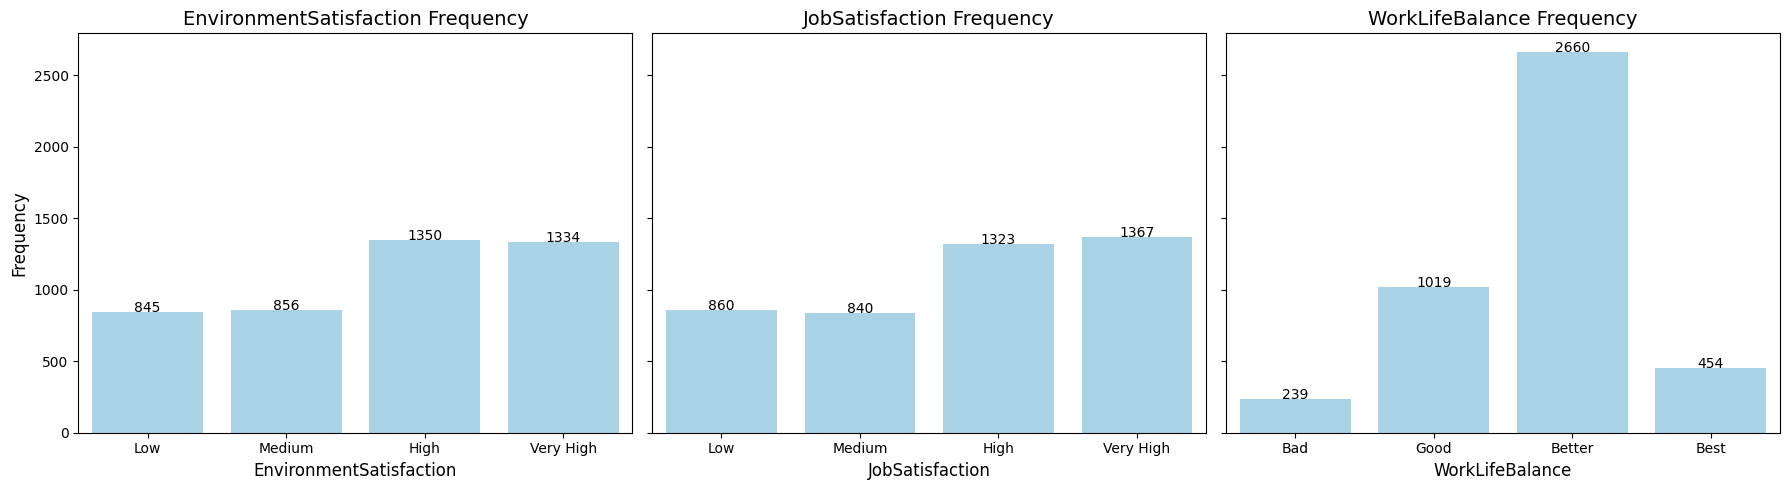

In [365]:
# List of columns to plot and corresponding label mappings
columns_to_plot = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]
label_mappings = {
    "EnvironmentSatisfaction": {1.0: "Low", 2.0: "Medium", 3.0: "High", 4.0: "Very High"},
    "JobSatisfaction": {1.0: "Low", 2.0: "Medium", 3.0: "High", 4.0: "Very High"},
    "WorkLifeBalance": {1.0: "Bad", 2.0: "Good", 3.0: "Better", 4.0: "Best"}
}

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 5), sharey=True)

for idx, column in enumerate(columns_to_plot):
    value_counts = emp_survey[column].value_counts().sort_index()
    mapped_labels = [label_mappings[column][x] for x in value_counts.index]

    sns.barplot(ax=axes[idx], x=mapped_labels, y=value_counts.values, color='skyblue', alpha=0.8)

    for bar_idx, count in enumerate(value_counts.values):
        axes[idx].text(bar_idx, count + 0.1, str(count), ha='center', fontsize=10)

    axes[idx].set_title(f"{column} Frequency", fontsize=14)
    axes[idx].set_xlabel(column, fontsize=12)

# Set shared y-axis label
axes[0].set_ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

### 3.2 - General Data

##### 3.2.1 - Employee Demographics

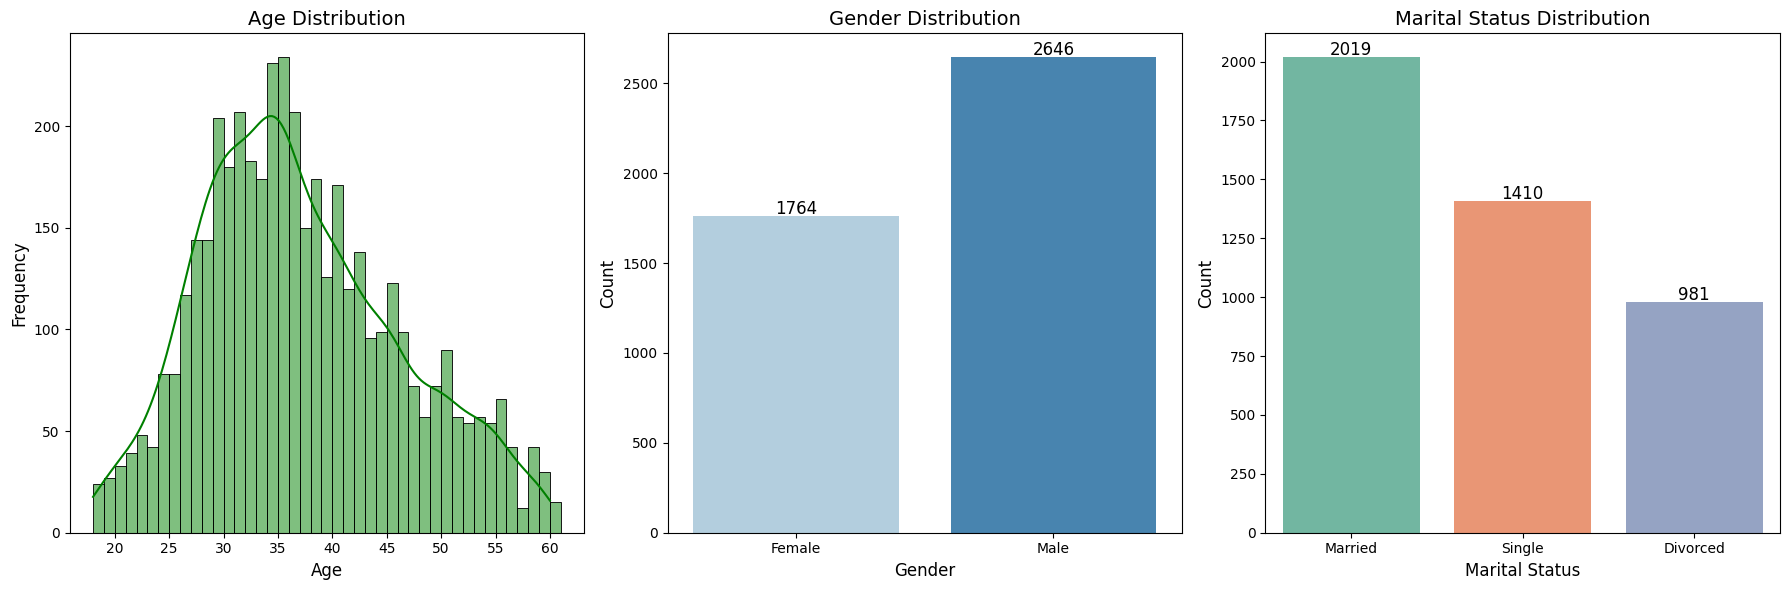

In [366]:
# Employee Demographic Bar Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Age' distribution
sns.histplot(emp_general['Age'], kde=True, color='green', bins=range(18, max(emp_general['Age']) + 2, 1), stat="count", ax=axes[0])
axes[0].set_title("Age Distribution", fontsize=14)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_xticks(range(20, max(emp_general['Age']) + 1, 5))

# Plot for Gender distribution with palette
sns.countplot(x='Gender', data=emp_general, palette='Blues', ax=axes[1])
axes[1].set_title("Gender Distribution", fontsize=14)
axes[1].set_xlabel("Gender", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

# Add count labels on top of bars for Gender
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 5), textcoords='offset points')

# Plot for MaritalStatus distribution
sns.countplot(x='MaritalStatus', data=emp_general, palette='Set2', ax=axes[2])
axes[2].set_title("Marital Status Distribution", fontsize=14)
axes[2].set_xlabel("Marital Status", fontsize=12)
axes[2].set_ylabel("Count", fontsize=12)

# Add count labels on top of bars for MaritalStatus
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

- **Age:** The age distribution to slightly right-skewed with the median age being right around 35 years old
- **Gender:** There are almost 1,000 more male employees at XYZ company than female employees
- **Marital Status:** Most employees are married (2,019), followed by single employees (1,410), then divorced employees (981)

##### 3.2.2 - Departments

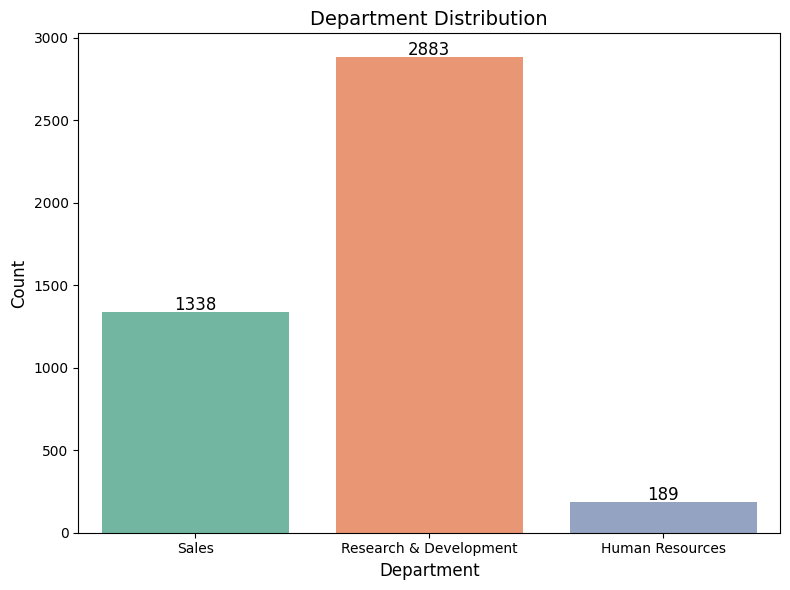

In [367]:
# Department Bar Plots
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', data=emp_general, palette='Set2')
plt.title("Department Distribution", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add count labels on top of bars for Department
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

A large majority of employees at XYZ are in Research and Development, with the least being in HR. 

##### 3.2.3 - Education

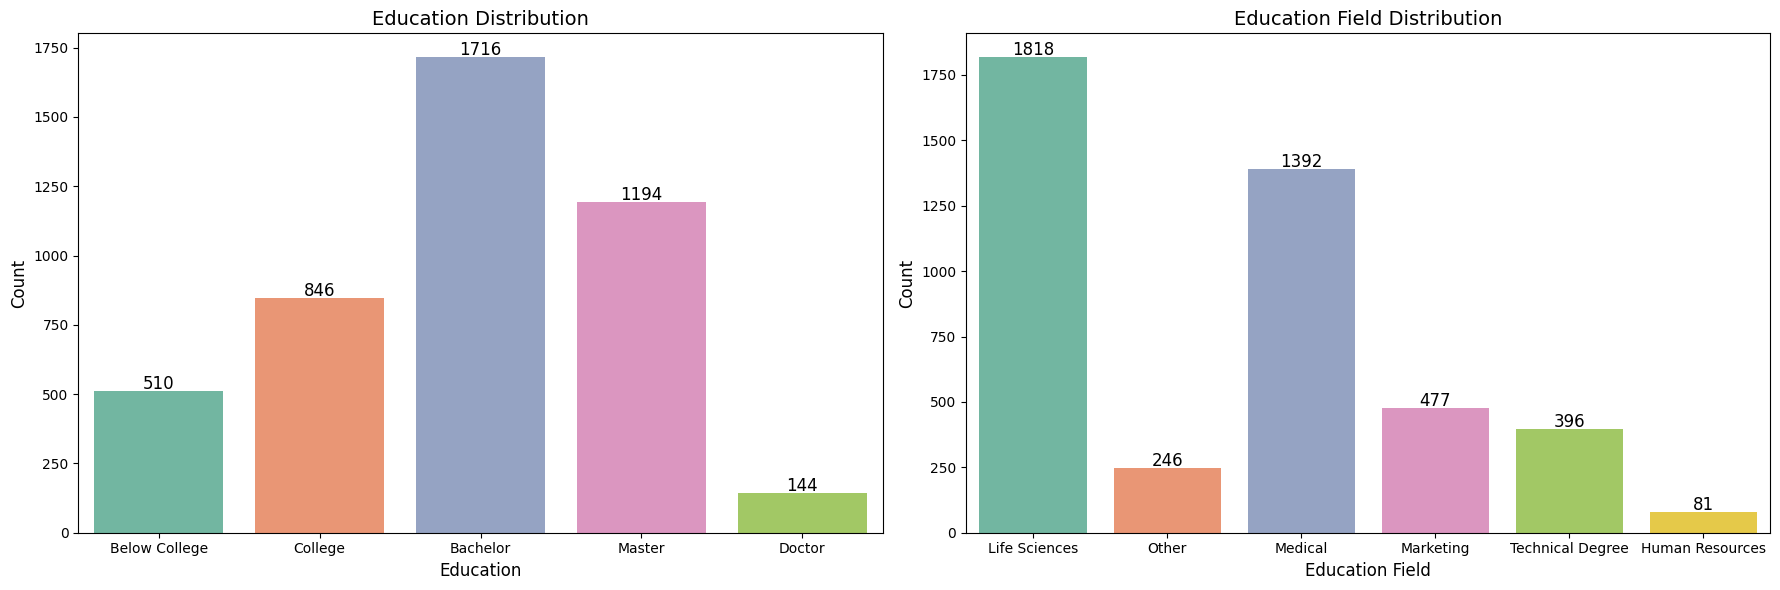

In [368]:
# Education Bar Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'Education' distribution with custom labels
sns.countplot(x='Education', data=emp_general, palette='Set2', ax=axes[0])
axes[0].set_title("Education Distribution", fontsize=14)
axes[0].set_xlabel("Education", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Custom labels for Education
education_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
axes[0].set_xticklabels(education_labels)

# Add count labels on top of bars for Education
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 5), textcoords='offset points')

# Plot for EducationField distribution
sns.countplot(x='EducationField', data=emp_general, palette='Set2', ax=axes[1])
axes[1].set_title("Education Field Distribution", fontsize=14)
axes[1].set_xlabel("Education Field", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

# Add count labels on top of bars for EducationField
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

##### 3.2.4 - Job Level and Salary

In [369]:
# Creating Annual Income column from Monthly Income
emp_general['AnnualIncome'] = emp_general['MonthlyIncome'] * 12

# Convert Annual Income to USD from Rupee
exchange_rate_inr_to_usd = 0.012  

# Convert Annual Income from INR to USD
emp_general['AnnualIncomeUSD'] = emp_general['AnnualIncome'] * exchange_rate_inr_to_usd

# Display the updated DataFrame
print(emp_general[['AnnualIncome', 'AnnualIncomeUSD']].head())

   AnnualIncome  AnnualIncomeUSD
0       1573920         18887.04
1        502680          6032.16
2       2319360         27832.32
3        998520         11982.24
4        281040          3372.48


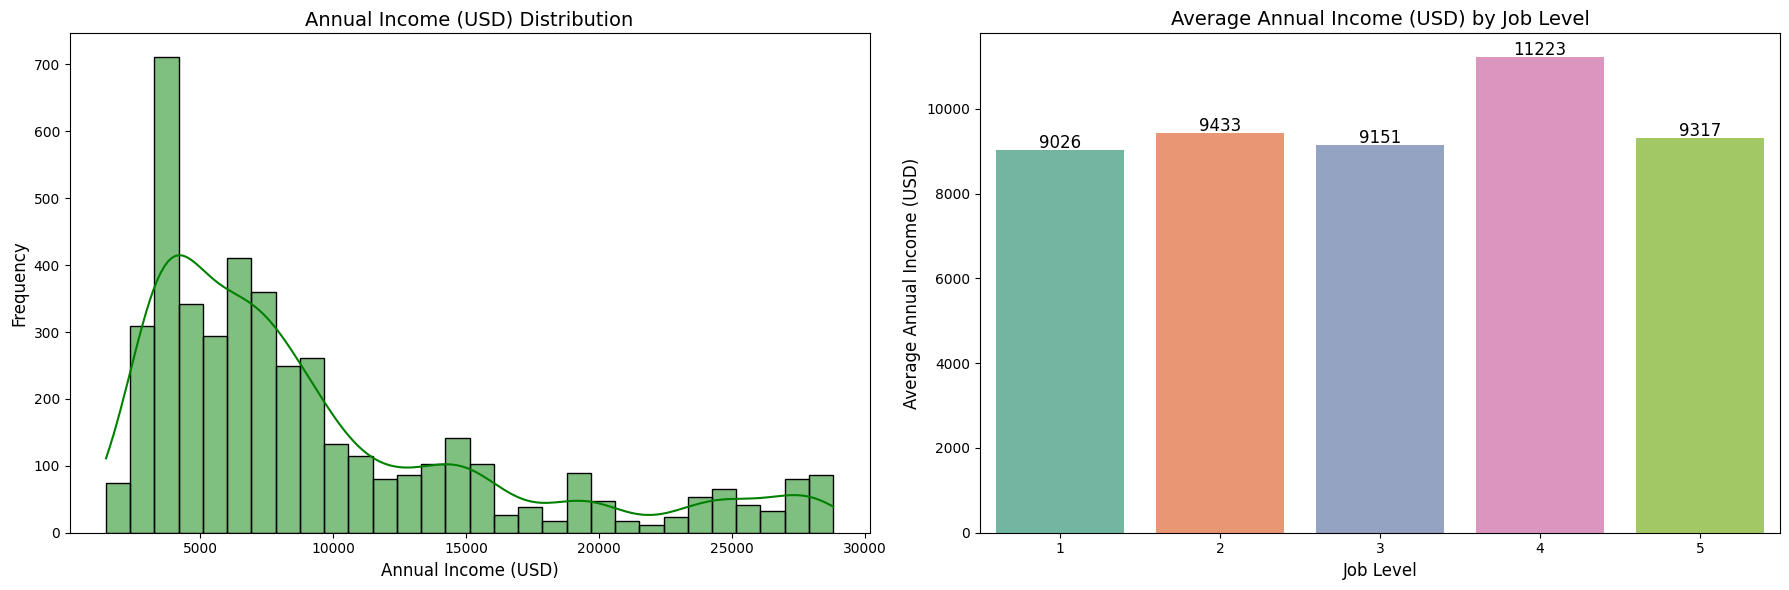

In [370]:
# Income Bar Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for the distribution of 'AnnualIncomeUSD'
sns.histplot(emp_general['AnnualIncomeUSD'], kde=True, color='green', bins=30, ax=axes[0])
axes[0].set_title("Annual Income (USD) Distribution", fontsize=14)
axes[0].set_xlabel("Annual Income (USD)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Plot for 'JobLevel' vs average 'AnnualIncomeUSD'
sns.barplot(x='JobLevel', y='AnnualIncomeUSD', data=emp_general, palette='Set2', ci=None, ax=axes[1])
axes[1].set_title("Average Annual Income (USD) by Job Level", fontsize=14)
axes[1].set_xlabel("Job Level", fontsize=12)
axes[1].set_ylabel("Average Annual Income (USD)", fontsize=12)

# Add count labels on top of bars for 'JobLevel'
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 5), textcoords='offset points')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

##### 3.2.5 - Travel

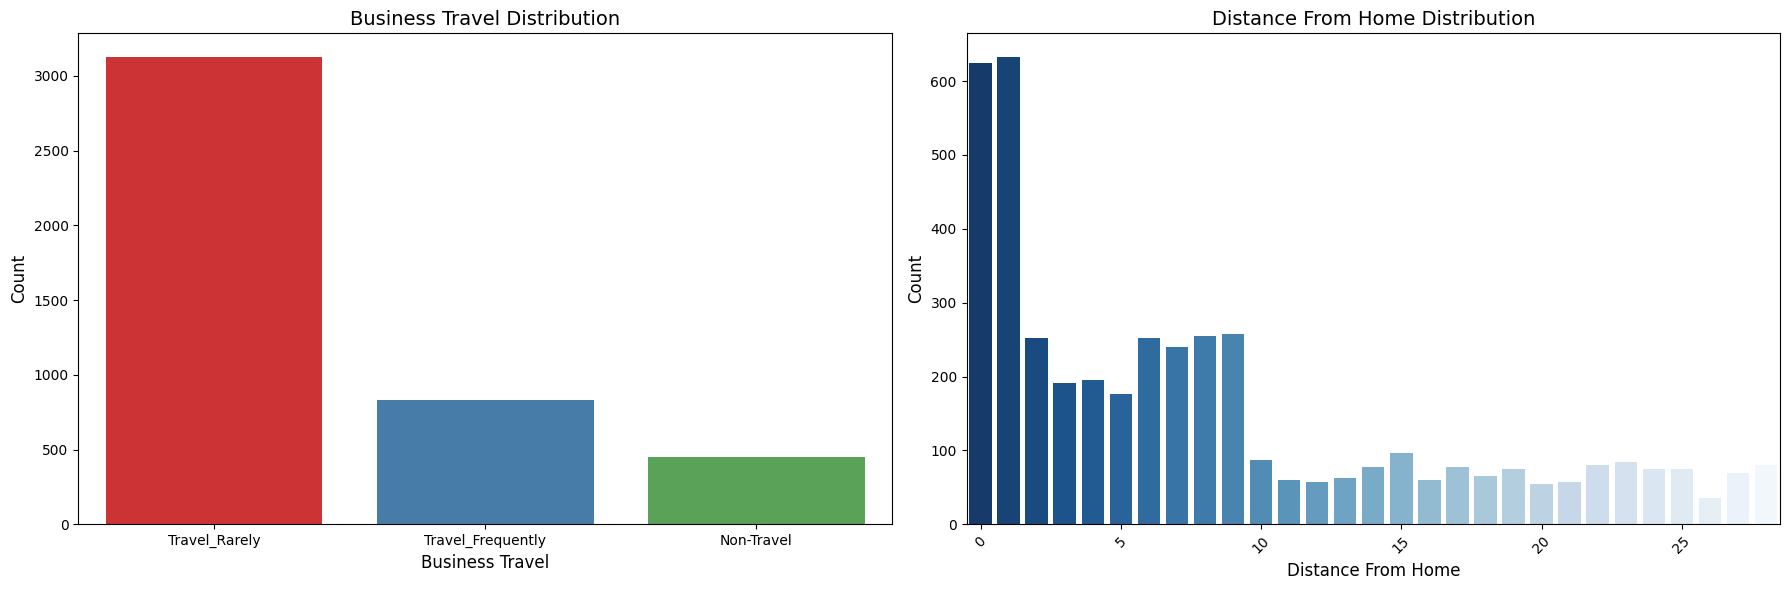

In [371]:
# Travel Bar Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'BusinessTravel' distribution
sns.countplot(x='BusinessTravel', data=emp_general, palette='Set1', ax=axes[0])
axes[0].set_title("Business Travel Distribution", fontsize=14)
axes[0].set_xlabel("Business Travel", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Plot for DistanceFromHome
sns.countplot(x='DistanceFromHome', data=emp_general, palette='Blues_r', ax=axes[1])
axes[1].set_title("Distance From Home Distribution", fontsize=14)
axes[1].set_xlabel("Distance From Home", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].set_xticks(range(0, emp_general['DistanceFromHome'].max() + 1, 5)) 
axes[1].set_xticklabels(range(0, emp_general['DistanceFromHome'].max() + 1, 5), rotation=45)

plt.tight_layout()
plt.show()

##### 3.2.6 - Work History

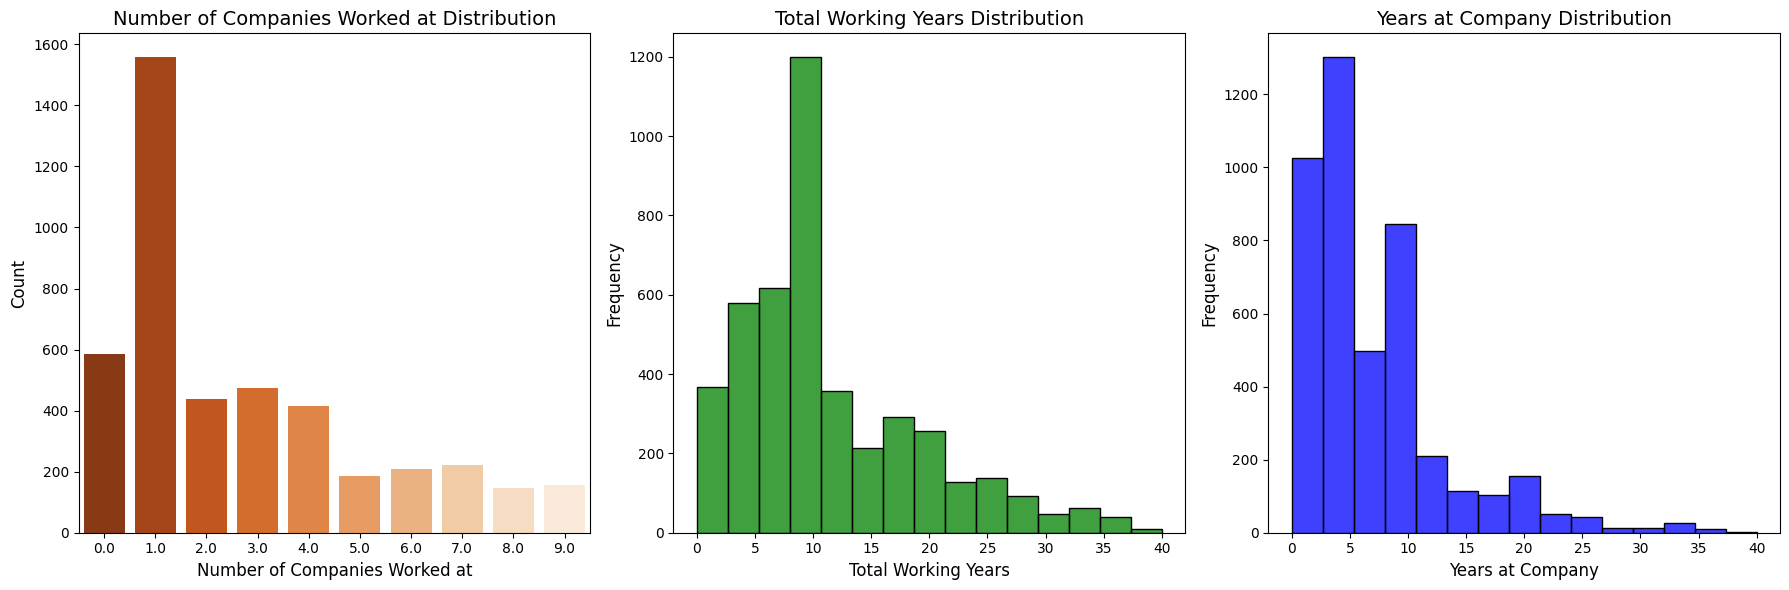

In [372]:
# Work History Bar Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for NumCompaniesWorked distribution
sns.countplot(x='NumCompaniesWorked', data=emp_general, palette='Oranges_r', ax=axes[0])
axes[0].set_title("Number of Companies Worked at Distribution", fontsize=14)
axes[0].set_xlabel("Number of Companies Worked at", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Plot for TotalWorkingYears distribution
sns.histplot(emp_general['TotalWorkingYears'], bins=15, color='green', kde=False, ax=axes[1])
axes[1].set_title("Total Working Years Distribution", fontsize=14)
axes[1].set_xlabel("Total Working Years", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Plot for 'YearsAtCompany' distribution
sns.histplot(emp_general['YearsAtCompany'], bins=15, color='blue', kde=False, ax=axes[2])
axes[2].set_title("Years at Company Distribution", fontsize=14)
axes[2].set_xlabel("Years at Company", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### 3.3 - Manager Survey Data

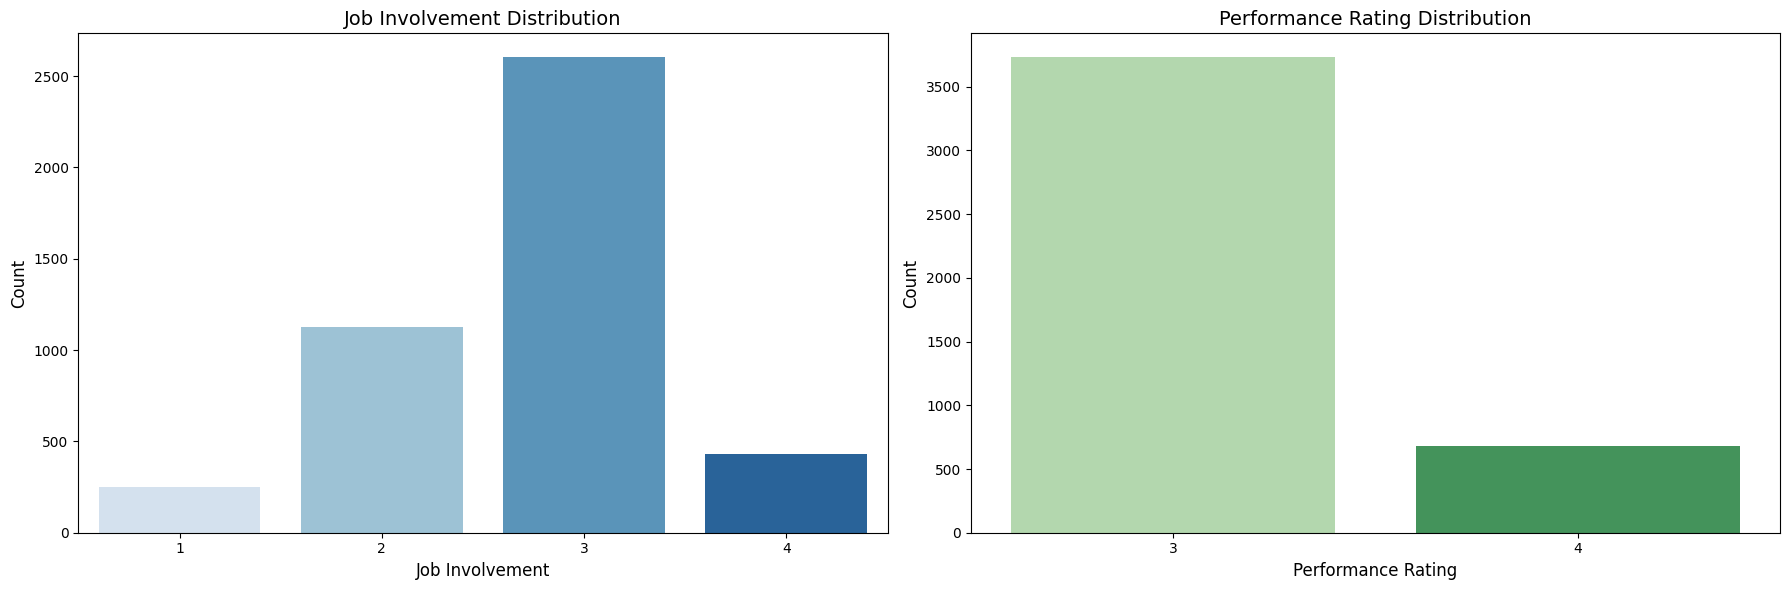

In [373]:
# Manager Survey Bar Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for JobInvolvement distribution
sns.countplot(x='JobInvolvement', data=mgr_survey, palette='Blues', ax=axes[0])
axes[0].set_title("Job Involvement Distribution", fontsize=14)
axes[0].set_xlabel("Job Involvement", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Plot for PerformanceRating distribution
sns.countplot(x='PerformanceRating', data=mgr_survey, palette='Greens', ax=axes[1])
axes[1].set_title("Performance Rating Distribution", fontsize=14)
axes[1].set_xlabel("Performance Rating", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

## 4.0 Exploratory Data Analysis when Attrition is Positve

In this section, we will visualize the data where attrition positive. The goal of this section is to better understand information for the employees who left the company. To add to this analysis, I will perform some feature engineering along the way that should help make the data and visualizations easier to understand. 

### 4.1 - Merging datasets so we can analyze employee attrition with all variables

In [374]:
# Make a copy of emp_general as hr_merged
hr_merged = emp_general.copy()


In [375]:
# Merge emp_survey into hr_merged on EmployeeID
hr_merged = hr_merged.merge(emp_survey, on='EmployeeID', how='left')

# Merge mgr_survey into hr_merged on EmployeeID
hr_merged = hr_merged.merge(mgr_survey, on='EmployeeID', how='left')

hr_merged.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AnnualIncome,AnnualIncomeUSD,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,0,0,1573920,18887.04,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,5,1,4,502680,6032.16,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,0,3,2319360,27832.32,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,7,5,998520,11982.24,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,6,0,4,281040,3372.48,4.0,1.0,3.0,3,3


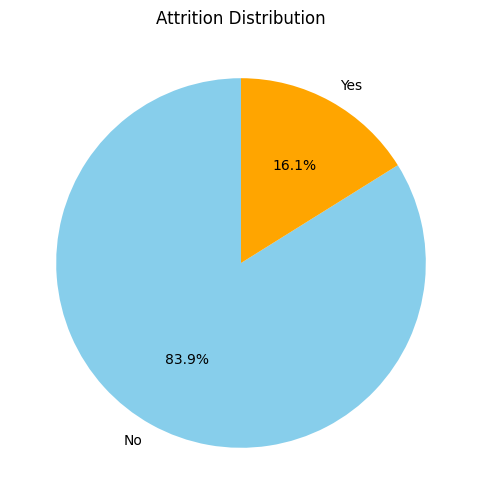

In [376]:
# Total Attrition Pie Chart
attrition_counts = hr_merged['Attrition'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Attrition Distribution')
plt.show()

As seen above, a majority of the employees at XYZ Company stayed with the company resulting in an attrition rate of 16.1%.

In [377]:
# Create filtered dataframe for where attriton = Yes
attrition_yes = hr_merged[hr_merged['Attrition'] == 'Yes']

In [378]:
print("Positive Attrition Dataframe shape is:", attrition_yes.shape)
print("Merged dataframe shape is:", hr_merged.shape)

Positive Attrition Dataframe shape is: (711, 31)
Merged dataframe shape is: (4410, 31)


### 4.2 - Employee Survey Data

Since we know many of our responses are imbalanced, we want to calculate the percentage of attrition for each employee survey response. For example, when employees responded to the work-life-balance, only 5.5% responded with a "bad" work-life-balance while 61% responded with "better". If we were to just plot the % of employees who left, it would likely reflect a majority of employees leaving who had a "better" work-life-balance even though that is not actually the reality. 

Instead below, we will show the percentage of each response among the employees who left the company. 

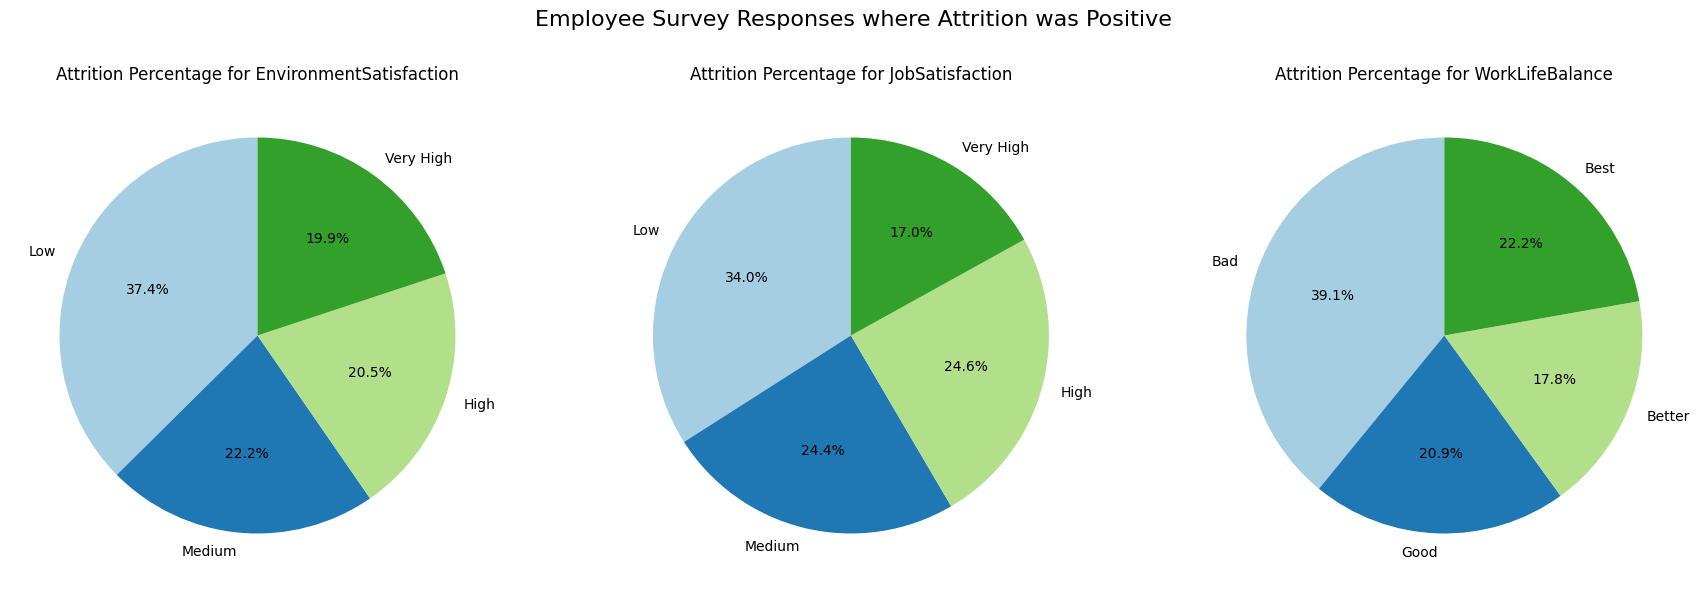

In [379]:
#Employee Survey Attrition Percentages
emp_survey_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

emp_survey_labels = {
    'EnvironmentSatisfaction': {1.0: 'Low', 2.0: 'Medium', 3.0: 'High', 4.0: 'Very High'},
    'JobSatisfaction': {1.0: 'Low', 2.0: 'Medium', 3.0: 'High', 4.0: 'Very High'},
    'WorkLifeBalance': {1.0: 'Bad', 2.0: 'Good', 3.0: 'Better', 4.0: 'Best'}
}

# Plot pie charts for each column in emp_survey_cols
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

for i, col in enumerate(emp_survey_cols):
    attrition_percentage = hr_merged.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0)
    attrition_percentage = attrition_percentage['Yes'] * 100 
    
    attrition_percentage.index = attrition_percentage.index.map(emp_survey_labels[col])
    
    axes[i].pie(
        attrition_percentage,
        labels=attrition_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'Attrition Percentage for {col}')

# Add a general title
fig.suptitle('Employee Survey Responses where Attrition was Positive', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

As expected for each response type, the lowest response type had the highest percentage of employees who left. This tells XYZ company that it is important to review these employee surveys and try and help the employees who are unhappy, since it is more cost-effective to retain talent than hiring new talent once they leave.

### 4.3 - General Data

##### 4.3.1 - Employee Demographics

In [380]:
# Creating new feature for age groups
age_bins = [18, 25, 35, 45, 55, float('inf')] 
age_labels = ['18-25', '26-35', '36-45', '46-55', 'Over 55'] 
hr_merged['AgeGroup'] = pd.cut(hr_merged['Age'], bins=age_bins, labels=age_labels, right=False)

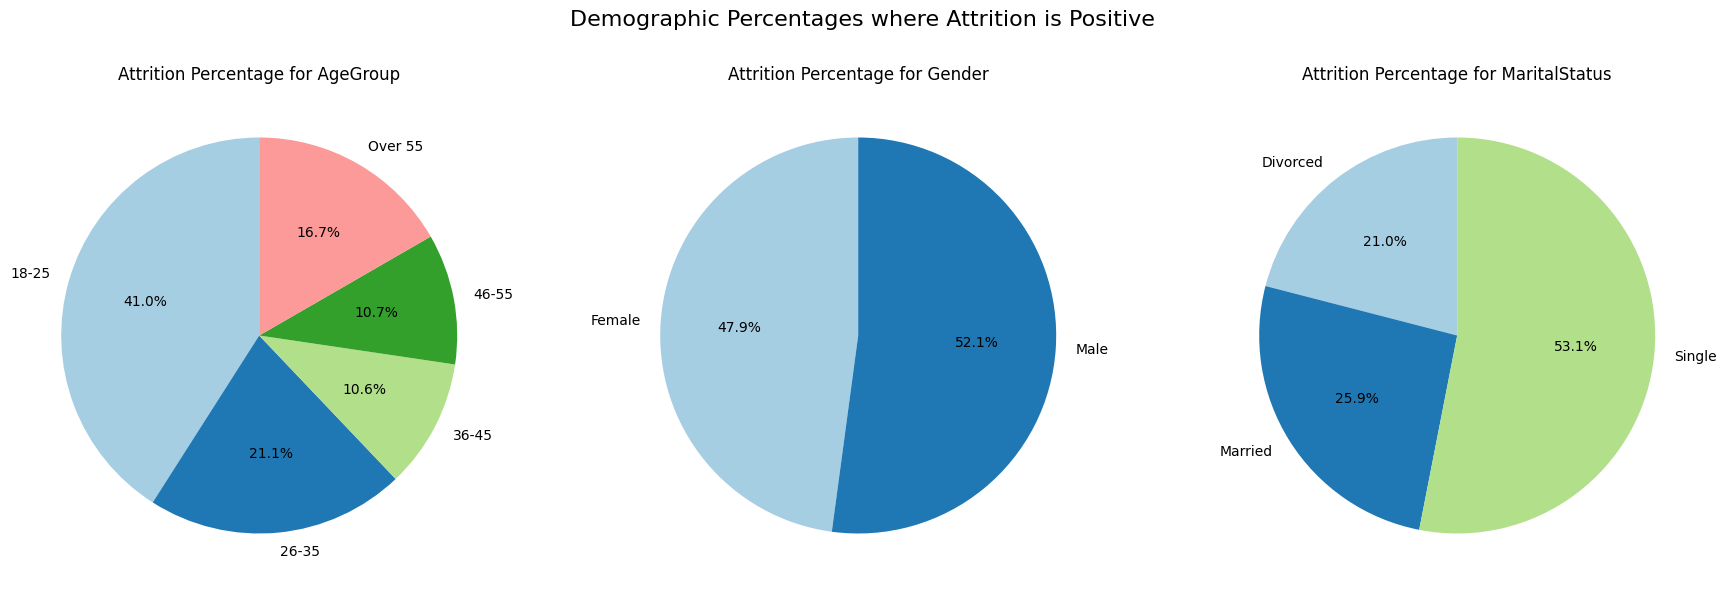

In [381]:
# Demographic Attrition Pie Charts
demographic_cols = ['AgeGroup', 'Gender', 'MaritalStatus']

# Plot pie charts for each of the three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(demographic_cols):
    attrition_percentage = hr_merged.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0)
    attrition_percentage = attrition_percentage['Yes'] * 100
    
    axes[i].pie(
        attrition_percentage,
        labels=attrition_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'Attrition Percentage for {col}')

# Add a general title for all pie charts
fig.suptitle('Demographic Percentages where Attrition is Positive', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

- **Age:** Can clearly see that younger employees are more likely to leave the company. This could be for many reasons such as career changes, going back to school, higher job offers, moving cities, etc... Older employees seem to happier staying with the same company in the role they are in. We also create a new feature to reflect different age groups so better show this.
- **Gender:** Almost equal
- **Marital Status:** Over 50% of employees who leave are single.

##### 4.3.2 - Education Level

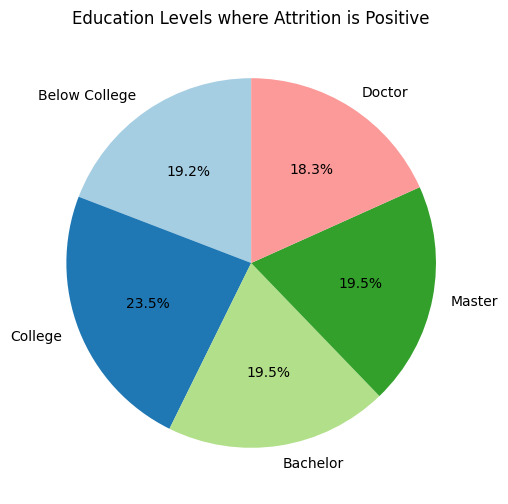

In [382]:
# Education Level Attrition Plots

# Education labels
education_labels = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

education_attrition_percentage = hr_merged.groupby('Education')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
education_attrition_percentage = education_attrition_percentage['Yes'] * 100  

education_attrition_percentage.index = education_attrition_percentage.index.map(education_labels)

# Plot the results
plt.figure(figsize=(8, 6))
plt.pie(
    education_attrition_percentage,
    labels=education_attrition_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Education Levels where Attrition is Positive')
plt.show()

No education level stands out when it comes to those who are no longer employees of XYZ company.

##### 4.3.3 - Salary and Income Data 

In [383]:
# Descriptive Statistics for these categories 
hr_merged['AnnualIncomeUSD'].describe()

count     4410.000000
mean      9364.221061
std       6777.919953
min       1452.960000
25%       4191.840000
50%       7083.360000
75%      12067.200000
max      28798.560000
Name: AnnualIncomeUSD, dtype: float64

In [384]:
hr_merged['PercentSalaryHike'].describe()

count    4410.000000
mean       15.209524
std         3.659108
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [385]:
# Creating New Variables
income_bins = [0, 5000, 12000, float('inf')]
income_labels = ['Less than 5,000', '6,000-12,000', 'More than 13,000']

hike_bins = [0, 10, 17, float('inf')]
hike_labels = ['Less than 10', '11-17', 'More than 18']

# Create grouped columns
hr_merged['IncomeGroup'] = pd.cut(hr_merged['AnnualIncomeUSD'], bins=income_bins, labels=income_labels, right=False)
hr_merged['HikeGroup'] = pd.cut(hr_merged['PercentSalaryHike'], bins=hike_bins, labels=hike_labels, right=False)

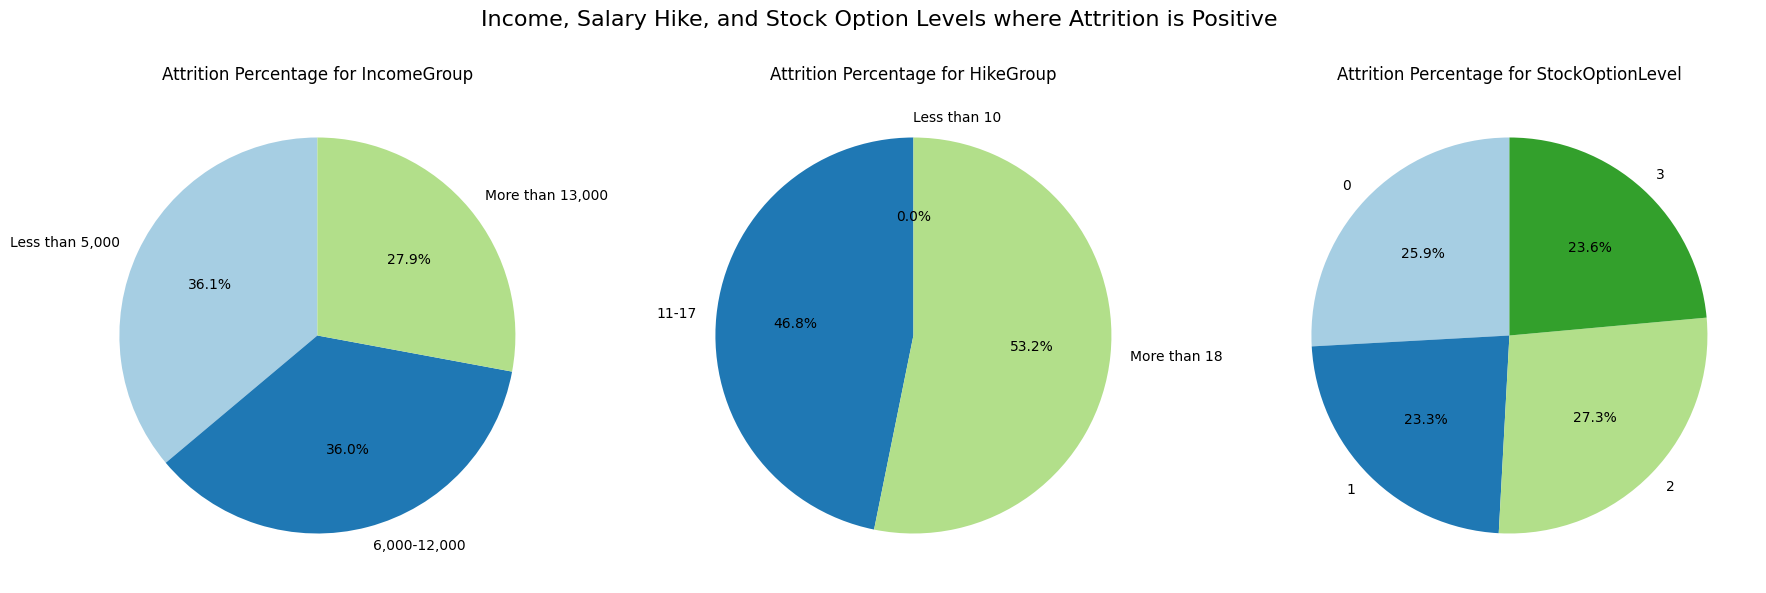

In [386]:
# Income Attrition Pie Charts
income_cols = ['IncomeGroup', 'HikeGroup', 'StockOptionLevel']

# Plot pie charts for each of the income-related columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(income_cols):
    attrition_percentage = hr_merged.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0)
    attrition_percentage = attrition_percentage['Yes'] * 100 
    
    # Plot the pie chart
    axes[i].pie(
        attrition_percentage,
        labels=attrition_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'Attrition Percentage for {col}')

# Add a general title for the plots
fig.suptitle('Income, Salary Hike, and Stock Option Levels where Attrition is Positive', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()


##### 4.3.4 - Work History

In [387]:
def print_describe(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"Descriptive statistics for '{column}':")
            print(df[column].describe())
            print("\n" + "-"*50 + "\n")
        else:
            print(f"Column '{column}' not found in the DataFrame.\n")

columns_to_describe = [
    "NumCompaniesWorked", 
    "TotalWorkingYears", 
    "YearsAtCompany", 
    "YearsSinceLastPromotion", 
    "YearsWithCurrManager"
]

print_describe(hr_merged, columns_to_describe)


Descriptive statistics for 'NumCompaniesWorked':
count    4391.000000
mean        2.694830
std         2.498887
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

--------------------------------------------------

Descriptive statistics for 'TotalWorkingYears':
count    4401.000000
mean       11.279936
std         7.782222
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

--------------------------------------------------

Descriptive statistics for 'YearsAtCompany':
count    4410.000000
mean        7.008163
std         6.125135
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

--------------------------------------------------

Descriptive statistics for 'YearsSinceLastPromotion':
count    4410.000000
me

In [388]:
# Creating Grouped Variables
hr_merged['NumCompaniesWorkedGrouped'] = pd.cut(
    hr_merged['NumCompaniesWorked'], 
    bins=[0, 2, 5, float('inf')], 
    labels=['1-2', '3-5', '5+'], 
    right=False
)

hr_merged['TotalWorkingYearsGrouped'] = pd.cut(
    hr_merged['TotalWorkingYears'], 
    bins=[-1, 4, 10, 15, float('inf')], 
    labels=['0-4', '5-10', '10-15', '16+'], 
    right=False
)

hr_merged['YearsAtCompanyGrouped'] = pd.cut(
    hr_merged['YearsAtCompany'], 
    bins=[-1, 3, 7, 15, float('inf')], 
    labels=['0-3', '4-7', '8-15', '20+'], 
    right=False
)

hr_merged['YearsSinceLastPromotionGrouped'] = pd.cut(
    hr_merged['YearsSinceLastPromotion'], 
    bins=[-1, 1, 5, float('inf')], 
    labels=['0-1', '2-5', '6+'], 
    right=False
)

hr_merged['YearsWithCurrManagerGrouped'] = pd.cut(
    hr_merged['YearsWithCurrManager'], 
    bins=[-1, 2, 6, float('inf')], 
    labels=['0-2', '2-6', '7+'], 
    right=False
)


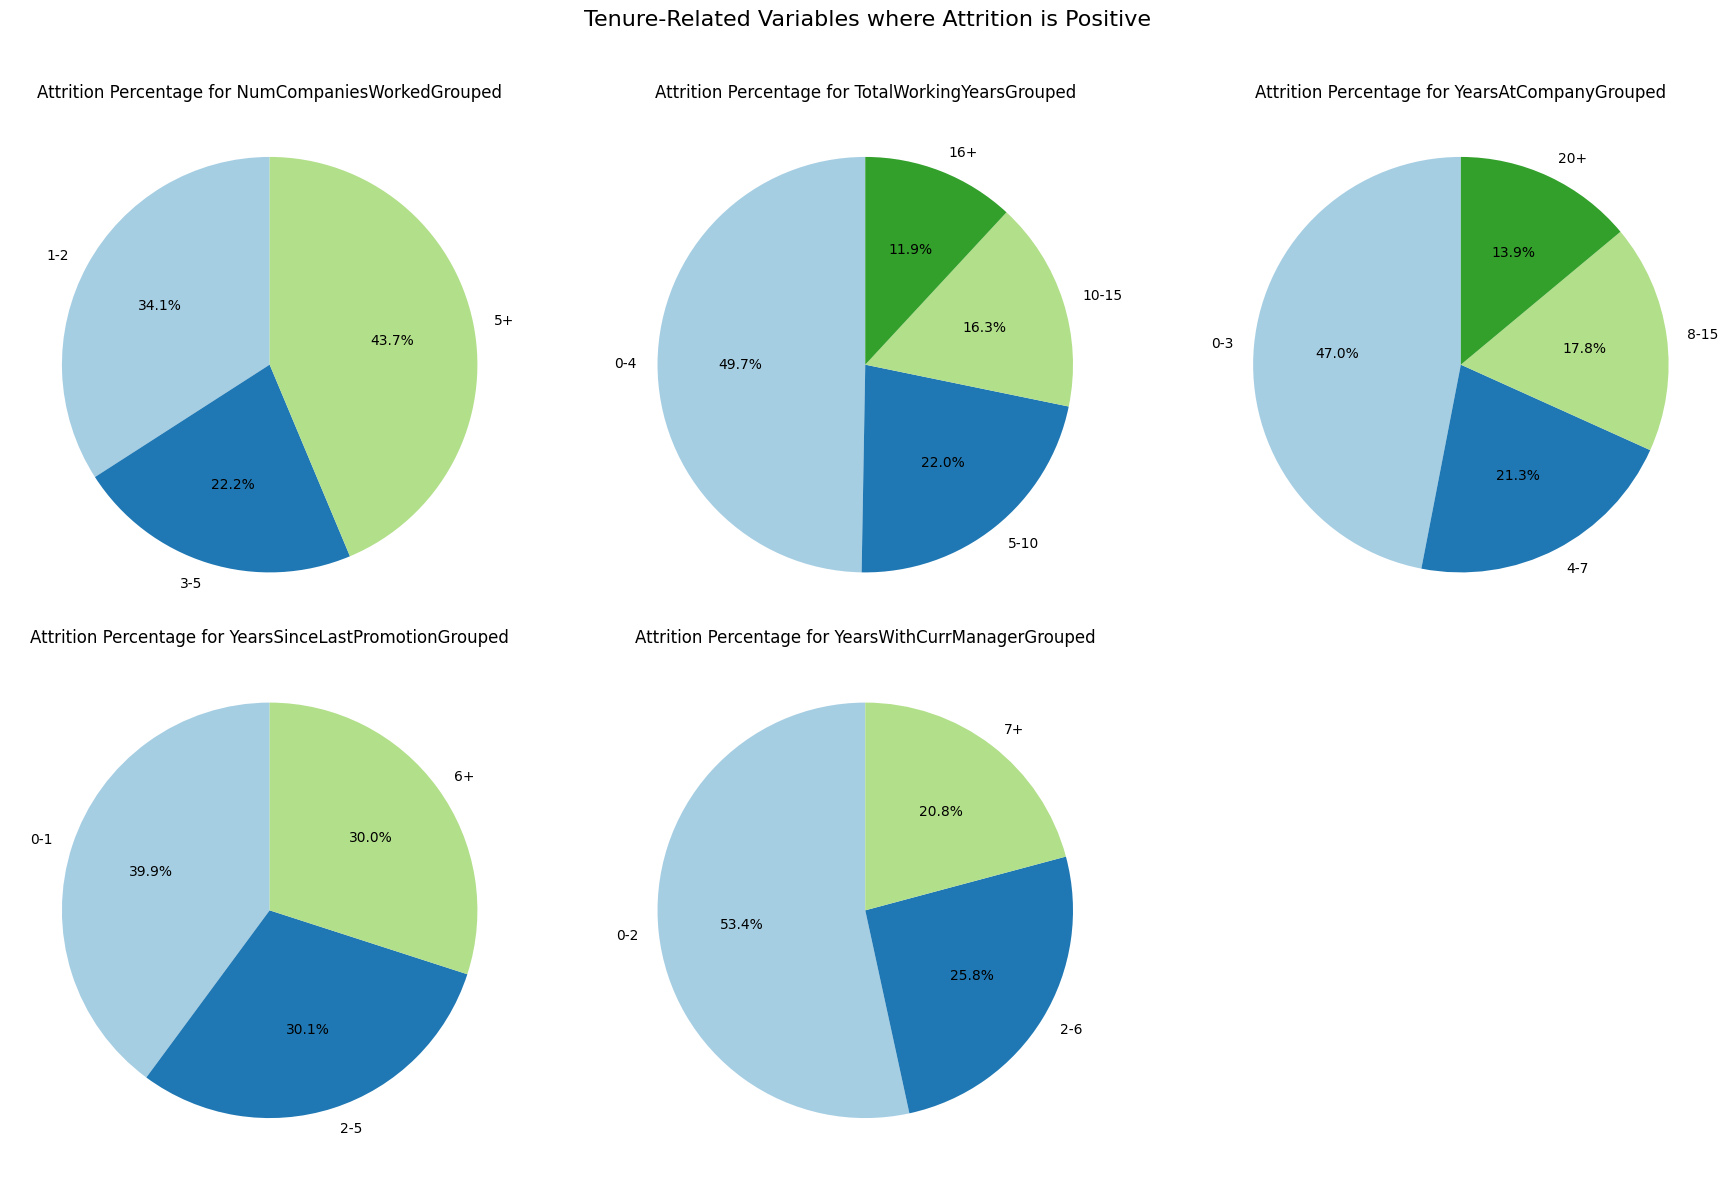

In [389]:
# Tenure Attrition Pie Charts
tenure_cols = [
    'NumCompaniesWorkedGrouped', 
    'TotalWorkingYearsGrouped', 
    'YearsAtCompanyGrouped', 
    'YearsSinceLastPromotionGrouped', 
    'YearsWithCurrManagerGrouped'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
axes = axes.flatten()

for i, col in enumerate(tenure_cols):
    attrition_percentage = hr_merged.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0)
    attrition_percentage = attrition_percentage['Yes'] * 100  
    
    # Plot pie chart
    axes[i].pie(
        attrition_percentage,
        labels=attrition_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'Attrition Percentage for {col}')

for j in range(len(tenure_cols), len(axes)):
    fig.delaxes(axes[j])

# Add a general title for the pie charts
fig.suptitle('Tenure-Related Variables where Attrition is Positive', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.90)  
plt.show()



- **Number of Companies Worked at:** Not a huge surprise, but those who have worked at 5+ companies have the highest attrition % meaning the trend for those who bounced around companies more often did not stop at XYZ company.
- **Total Working Years and Years at Company:** Similar to what we saw when looking at employee age, those who have less total working years and years at the company have a higher attrition rate like due to young professionals making early career changes, trying new companies, or being let go for having less experience. 
- **Years Since Last Promotion:** All categories are pretty similar
- **Years with Current Manager:** Similar to total working years and years at the company, those with only 0-2 years with current manager has the highest attrition rate


##### 4.3.5 - Travel

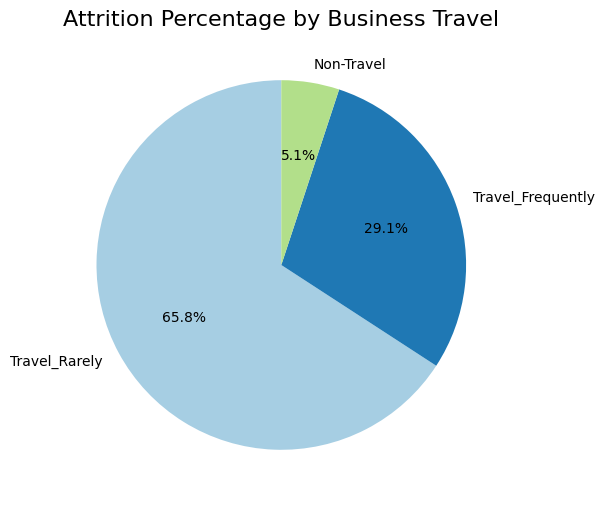

In [ ]:
# Pie Chart for Business Traveling Employees
business_travel_attrition = hr_merged[hr_merged['Attrition'] == 'Yes']['BusinessTravel'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    business_travel_attrition,
    labels=business_travel_attrition.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Attrition Percentage by Business Travel', fontsize=16)
plt.show()


Surprisingly, a majority of employees who left traveled rarely.

### 4.4 - Manager Survey Data

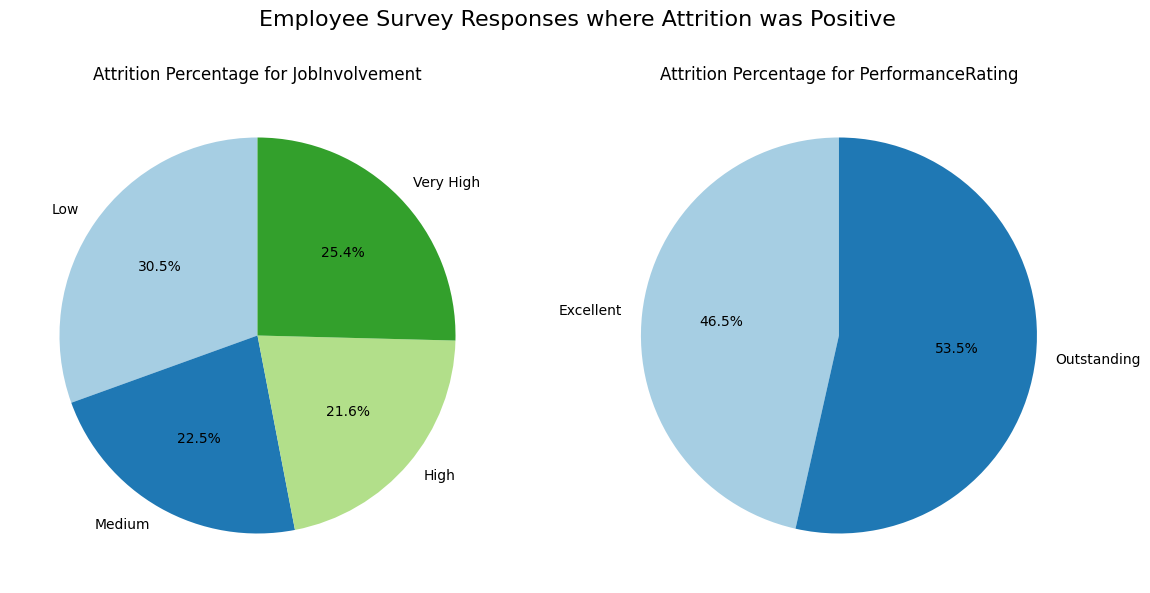

In [391]:
# Manager Survey Attrition Pie Chart
mgr_survey_labels_new = {
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
}

# Plot pie charts for each new column
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the new columns
mgr_survey_cols_new = ['JobInvolvement', 'PerformanceRating']

for i, col in enumerate(mgr_survey_cols_new):
    # Calculate the attrition percentages for each category in the column
    attrition_percentage = hr_merged.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0)
    attrition_percentage = attrition_percentage['Yes'] * 100  # Get the percentage of attrition
    
    # Map the labels for each column
    attrition_percentage.index = attrition_percentage.index.map(mgr_survey_labels_new[col])
    
    # Plot the pie chart
    axes[i].pie(
        attrition_percentage,
        labels=attrition_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'Attrition Percentage for {col}')

# Add a general title
fig.suptitle('Employee Survey Responses where Attrition was Positive', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Surprisingly, nothing overly stands out from manager surveys. 

### 4.5 - Example of a typical employee that has positive attrition

In the above graphs, it allows us to better the understand our company and which employees are more likely to leave or be let go from the company. As mentioned at the start and throughout this notebook, it is more cost-effective to retain talent than hire new talent making it so important to understand which employees could result in positive attrition. 

Below, we will highlight some of the significant findings from our visualizations and summarize an example employee.

- Employees who gave low ratings in their employee surveys, represented by the rating '1.0' in Environment and Job Satisfaction as well as work-life balance
- Employees especially of the ages 18-25, as well as 26-35 years of age
- Employees who have previously worked at multiples companies, have worked for less than 4 years, and have been at the company for less than 3 years


While the above was done by simply examining our graphs, if we were tasked to test any statistically significant groups we could do so in multiple ways. Below, I have performed a Z-test to calculate if the 18-25 age group is statistically significant compared to the rest of the age groups in positive attrition cases. If necessary, we could perform similar tests for other variables as well. 

In [392]:
# Example of a Statistical Test
from statsmodels.stats.proportion import proportions_ztest

def check_significance(p_value):
    if p_value < 0.05:
        return "Reject null hypothesis: Statistically significant."
    else:
        return "Fail to reject null hypothesis: Not statistically significant."

# Calculate the number of positive attrition cases for 18-25 and other age groups
attrition_18_25 = hr_merged[(hr_merged['AgeGroup'] == '18-25') & (hr_merged['Attrition'] == 'Yes')].shape[0]
attrition_other = hr_merged[(hr_merged['AgeGroup'] != '18-25') & (hr_merged['Attrition'] == 'Yes')].shape[0]

# Total counts for each group
total_18_25 = hr_merged[hr_merged['AgeGroup'] == '18-25'].shape[0]
total_other = hr_merged[hr_merged['AgeGroup'] != '18-25'].shape[0]

# Proportions
p_18_25 = attrition_18_25 / total_18_25
p_other = attrition_other / total_other

# Perform the z-test
count = np.array([attrition_18_25, attrition_other])
nobs = np.array([total_18_25, total_other])

z_stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")
print(check_significance(p_value)) 



Z-Statistic: 11.06510053157528
P-Value: 1.8525502788543236e-28
Reject null hypothesis: Statistically significant.


As seen above, the age group of 18-25 is statistically significant.

## 5.0 - Data Cleaning

### 5.1 - Checking for Missing Values

In [393]:
hr_merged.isna().sum()

Age                                0
Attrition                          0
BusinessTravel                     0
Department                         0
DistanceFromHome                   0
Education                          0
EducationField                     0
EmployeeCount                      0
EmployeeID                         0
Gender                             0
JobLevel                           0
JobRole                            0
MaritalStatus                      0
MonthlyIncome                      0
NumCompaniesWorked                19
Over18                             0
PercentSalaryHike                  0
StandardHours                      0
StockOptionLevel                   0
TotalWorkingYears                  9
TrainingTimesLastYear              0
YearsAtCompany                     0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
AnnualIncome                       0
AnnualIncomeUSD                    0
EnvironmentSatisfaction           25
J

In [394]:
hr_merged.shape

(4410, 39)

The features with missing variables are
- Number of Companies Worked (and Grouped)
- Total Working Years (and Grouped)
- Environment Satisfaction
- Job Satisfaction
- Work Life Balance

Before proceeding, it is important to think of why these variables might be missing and what kind of variable it is. In different cases and different types of data, there can be plenty of reasons for missing data. In this case, we see most of these values are likely from employees filling out personal information and the missing values being from human error. 

In [395]:
def missing_percentage(df):
    total_rows = df.shape[0]
    missing = (df.isnull().sum() / total_rows)
    return missing[missing > 0].round(5).sort_values(ascending=False)

# Example usage with hr_merged
missing_percent = missing_percentage(hr_merged)
print(missing_percent)



WorkLifeBalance              0.00862
EnvironmentSatisfaction      0.00567
JobSatisfaction              0.00454
NumCompaniesWorked           0.00431
NumCompaniesWorkedGrouped    0.00431
TotalWorkingYears            0.00204
TotalWorkingYearsGrouped     0.00204
dtype: float64


Above, I printed each feature's missing value percentage. As seen, all of the above are also less than 1% of its column so we can drop these values without it overly impacting our analysis. In other scenarios, we can apply different imputation techniques depending on the column type.

In [396]:
# Drop rows with any missing values
hr_merged_clean = hr_merged.dropna()

# Print the new shape of the DataFrame
print("Original shape:", hr_merged.shape)
print("New shape after dropping missing rows:", hr_merged_clean.shape)


Original shape: (4410, 39)
New shape after dropping missing rows: (4300, 39)


### 5.2 - Insignificant Rows

When we did our previous data visualizations, we created new features that better suited our visualizations (grouping together age, number of years worked, year with company, etc...) resulting in some redundant features. 

In [397]:
hr_merged_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AnnualIncome', 'AnnualIncomeUSD', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating', 'AgeGroup', 'IncomeGroup', 'HikeGroup',
       'NumCompaniesWorkedGrouped', 'TotalWorkingYearsGrouped',
       'YearsAtCompanyGrouped', 'YearsSinceLastPromotionGrouped',
       'YearsWithCurrManagerGrouped'],
      dtype='object')

In [398]:
hr_merged.shape

(4410, 39)

while we will still drop more columns after encoding categorical variables, there are a few rows we do not need. 

These columns are
- Employee Count
- Employee ID
- Over 18
- Standard Hours
- Monthly Income

In [399]:
# Drop the specified columns
columns_to_drop = ['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours', 'MonthlyIncome']
hr_merged_clean = hr_merged_clean.drop(columns=columns_to_drop)

In [400]:
hr_merged.shape

(4410, 39)

### 5.3 - Outliers

Earlier, we visualized our variables and printed some of the descriptive statistics, nothing stood out as a far outlier that would affect our analysis. It is important to think of this step while initially looking at the data as it can have an impact on all aspects of the analysis. 

### 5.4 - Labeling Variables

In [401]:
hr_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             4300 non-null   int64   
 1   Attrition                       4300 non-null   object  
 2   BusinessTravel                  4300 non-null   object  
 3   Department                      4300 non-null   object  
 4   DistanceFromHome                4300 non-null   int64   
 5   Education                       4300 non-null   int64   
 6   EducationField                  4300 non-null   object  
 7   Gender                          4300 non-null   object  
 8   JobLevel                        4300 non-null   int64   
 9   JobRole                         4300 non-null   object  
 10  MaritalStatus                   4300 non-null   object  
 11  NumCompaniesWorked              4300 non-null   float64 
 12  PercentSalaryHike        

In [402]:
# Define the mapping dictionaries
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

# Apply the mappings to the respective columns
hr_merged_clean['Education'] = hr_merged_clean['Education'].map(education_map)
hr_merged_clean['EnvironmentSatisfaction'] = hr_merged_clean['EnvironmentSatisfaction'].map(environment_satisfaction_map)
hr_merged_clean['JobInvolvement'] = hr_merged_clean['JobInvolvement'].map(job_involvement_map)
hr_merged_clean['JobSatisfaction'] = hr_merged_clean['JobSatisfaction'].map(job_satisfaction_map)
hr_merged_clean['PerformanceRating'] = hr_merged_clean['PerformanceRating'].map(performance_rating_map)
hr_merged_clean['WorkLifeBalance'] = hr_merged_clean['WorkLifeBalance'].map(work_life_balance_map)

# Verify the updates
hr_merged_clean[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance']].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,WorkLifeBalance
0,College,High,High,Very High,Excellent,Good
1,Below College,High,Medium,Medium,Outstanding,Best
2,Master,Medium,High,Medium,Excellent,Bad
3,Doctor,Very High,Medium,Very High,Excellent,Better
4,Below College,Very High,High,Low,Excellent,Better


### 5.5 - Encoding Categorical Variables

In this section, we will encode our categorical variables so they are in a clean format to be used in machine learning models. 

In [403]:
pd.set_option('display.max_columns', None) 
hr_merged_clean.head() 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AnnualIncome,AnnualIncomeUSD,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AgeGroup,IncomeGroup,HikeGroup,NumCompaniesWorkedGrouped,TotalWorkingYearsGrouped,YearsAtCompanyGrouped,YearsSinceLastPromotionGrouped,YearsWithCurrManagerGrouped
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,Married,1.0,11,0,1.0,6,1,0,0,1573920,18887.04,High,Very High,Good,High,Excellent,46-55,"More than 13,000",11-17,1-2,0-4,0-3,0-1,0-2
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,Single,0.0,23,1,6.0,3,5,1,4,502680,6032.16,High,Medium,Best,Medium,Outstanding,26-35,"6,000-12,000",More than 18,1-2,5-10,4-7,2-5,2-6
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,Married,1.0,15,3,5.0,2,5,0,3,2319360,27832.32,Medium,Medium,Bad,High,Excellent,26-35,"More than 13,000",11-17,1-2,5-10,4-7,0-1,2-6
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,Married,3.0,11,3,13.0,5,8,7,5,998520,11982.24,Very High,Very High,Better,Medium,Excellent,36-45,"6,000-12,000",11-17,3-5,10-15,8-15,6+,2-6
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,Single,4.0,12,2,9.0,2,6,0,4,281040,3372.48,Very High,Low,Better,High,Excellent,26-35,"Less than 5,000",11-17,3-5,5-10,4-7,0-1,2-6


In [404]:
pd.reset_option('display.max_columns')

The variables we will create dummy variables for are
- BusinessTravel
- Department
- Education
- Marital Status
- EnvironmentSatisfaction
- JobSatisfaction
- WorkLifeBalance
- JobInvolvement
- PerformanceRating

As of now these are redundant but we are also going to keep the grouped columns and encode them to test if our machine learning models prefer the feature itself or the grouped features.
- AgeGroup
- IncomeGroup
- HikeGroup
- NumCompaniesWorkedGrouped
- TotalWorkingYearsGrouped
- YearsAtCompanyGrouped
- YearsSinceLastPromotionGrouped
- YearsWithCurrManagerGrouped


We will then also drop 
- EducationField
- Job Role
- AnnualIncome


In [405]:
hr_merged_clean['JobLevel']=hr_merged_clean['JobLevel'].astype('object')

In [406]:
# One Hot Encoding / Creating Dummy Variables
variables_to_encode = [
    'BusinessTravel', 'Department', 'Education', 'MaritalStatus', 
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 
    'JobInvolvement', 'PerformanceRating', 'AgeGroup', 'IncomeGroup', 
    'HikeGroup', 'NumCompaniesWorkedGrouped', 'TotalWorkingYearsGrouped', 
    'YearsAtCompanyGrouped', 'YearsSinceLastPromotionGrouped', 
    'YearsWithCurrManagerGrouped', 'JobLevel', 'Gender'
]

# Apply one-hot encoding to the selected variables
hr_encoded = pd.get_dummies(hr_merged_clean, columns=variables_to_encode, drop_first=False)

# Verify the result
print("Shape before encoding:", hr_merged_clean.shape)
print("Shape after encoding:", hr_encoded.shape)

Shape before encoding: (4300, 34)
Shape after encoding: (4300, 82)


In [407]:
# Columns to drop
columns_to_drop = ['EducationField', 'JobRole', 'AnnualIncome']

# Drop the columns
hr_encoded = hr_encoded.drop(columns=columns_to_drop)

# Verify the changes
print("Updated columns:", hr_encoded.columns.tolist())
print("Shape after dropping columns:", hr_encoded.shape)

Updated columns: ['Age', 'Attrition', 'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AnnualIncomeUSD', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'Education_Bachelor', 'Education_Below College', 'Education_College', 'Education_Doctor', 'Education_Master', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'EnvironmentSatisfaction_High', 'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very High', 'JobSatisfaction_High', 'JobSatisfaction_Low', 'JobSatisfaction_Medium', 'JobSatisfaction_Very High', 'WorkLifeBalance_Bad', 'WorkLifeBalance_Best', 'WorkLifeBalance_Better', 'WorkLifeBalance_Good', 'JobInvolvement_High', 'JobInvolvement_Low'

In [408]:
# Encoding our Target Variable
hr_encoded['Attrition'] = hr_encoded['Attrition'].replace({'No': 0, 'Yes': 1})

In [409]:
hr_encoded = hr_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)
hr_encoded.head()

,Age,Attrition,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,YearsWithCurrManagerGrouped_0-2,YearsWithCurrManagerGrouped_2-6,YearsWithCurrManagerGrouped_7+,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,Gender_Female,Gender_Male
0,51,0,6,1.0,11,0,1.0,6,1,0,...,1,0,0,1,0,0,0,0,1,0
1,31,1,10,0.0,23,1,6.0,3,5,1,...,0,1,0,1,0,0,0,0,1,0
2,32,0,17,1.0,15,3,5.0,2,5,0,...,0,1,0,0,0,0,1,0,0,1
3,38,0,2,3.0,11,3,13.0,5,8,7,...,0,1,0,0,0,1,0,0,0,1
4,32,0,10,4.0,12,2,9.0,2,6,0,...,0,1,0,1,0,0,0,0,0,1


In [410]:
hr_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 79 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 4300 non-null   int64  
 1   Attrition                           4300 non-null   int64  
 2   DistanceFromHome                    4300 non-null   int64  
 3   NumCompaniesWorked                  4300 non-null   float64
 4   PercentSalaryHike                   4300 non-null   int64  
 5   StockOptionLevel                    4300 non-null   int64  
 6   TotalWorkingYears                   4300 non-null   float64
 7   TrainingTimesLastYear               4300 non-null   int64  
 8   YearsAtCompany                      4300 non-null   int64  
 9   YearsSinceLastPromotion             4300 non-null   int64  
 10  YearsWithCurrManager                4300 non-null   int64  
 11  AnnualIncomeUSD                     4300 non-nul

Now we can see that all of our variables are numerical and can be used in our machine learning algorithms. As previously mentioned, we know we will not use all of these columns when building our models. In the next notebook, I will cover the models themselves, feature selection, and choosing which model is best at predicting attrition. 

## 6.0 - Converting Cleaned Dataset to csv for next notebook

To make things easier in our next notebook, we will create two cleaned CSV files; one with the original features, and one with the grouped binary variables we created. 

In [411]:
# Creating copies for our two data sets
hr_clean = hr_encoded.copy()
hr_clean_grouped = hr_encoded.copy()

In [412]:
# List of columns to drop
hr_clean_columns_to_drop = [
    'AgeGroup_18-25', 'AgeGroup_26-35', 'AgeGroup_36-45', 
    'AgeGroup_46-55', 'AgeGroup_Over 55',
    'IncomeGroup_Less than 5,000', 'IncomeGroup_6,000-12,000', 
    'IncomeGroup_More than 13,000',
    'HikeGroup_Less than 10', 'HikeGroup_11-17', 
    'HikeGroup_More than 18',
    'NumCompaniesWorkedGrouped_1-2', 'NumCompaniesWorkedGrouped_3-5', 
    'NumCompaniesWorkedGrouped_5+',
    'TotalWorkingYearsGrouped_0-4', 'TotalWorkingYearsGrouped_5-10', 
    'TotalWorkingYearsGrouped_10-15', 'TotalWorkingYearsGrouped_16+',
    'YearsAtCompanyGrouped_0-3', 'YearsAtCompanyGrouped_4-7', 
    'YearsAtCompanyGrouped_8-15', 'YearsAtCompanyGrouped_20+',
    'YearsSinceLastPromotionGrouped_0-1', 
    'YearsSinceLastPromotionGrouped_2-5', 
    'YearsSinceLastPromotionGrouped_6+',
    'YearsWithCurrManagerGrouped_0-2', 
    'YearsWithCurrManagerGrouped_2-6', 
    'YearsWithCurrManagerGrouped_7+'
]

# Drop columns from hr_clean
hr_clean = hr_clean.drop(columns=hr_clean_columns_to_drop)

# Confirm the operation
print(f"Columns dropped from hr_clean. Remaining shape: {hr_clean.shape}")


Columns dropped from hr_clean. Remaining shape: (4300, 51)


In [413]:
# List of columns to drop
hr_clean_grouped_columns_to_drop = [
    'Age', 'AnnualIncomeUSD', 'PercentSalaryHike', 
    'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Drop columns from hr_clean
hr_clean_grouped = hr_clean_grouped.drop(columns=hr_clean_grouped_columns_to_drop)

# Confirm the operation
print(f"Columns dropped from hr_clean_grouped. Remaining shape: {hr_clean_grouped.shape}")

Columns dropped from hr_clean_grouped. Remaining shape: (4300, 71)


In [414]:
# Exporting both to CSV files
# hr_clean.to_csv('hr_clean.csv', index=False)

# Exporting hr_clean_grouped to a CSV file
# hr_clean_grouped.to_csv('hr_clean_grouped.csv', index=False)
